# Example 4: Ternary Tangent Pinch

#### Example 3 depicted a tangent pinch for a binary system.  This example shows how a tangent pinch is represented in a ternary system of Acetaldehyde, Methanol, and Water.

In these systems, as Reflux Ratio changes, the fixed point which terminates the rectifying section changes.  However, at the tangent pinch, a very small increment in reflux ratio causes the fixed point composition to rapidly shoot to a new value. 

This example shows the rectifying section experiences a jump at this tangent pinch, which occurs at a reflux ratio between 0.1 and 0.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import AntoineEquationBaseE

from distillation import DistillationModelTernary
import ipywidgets as widgets
from IPython.display import display, clear_output

from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output

from thermo_models import VanLaarModel
from distillation import PhasePortraits

plt.rcParams.update({"text.usetex": True,"font.family": "sans-serif","font.sans-serif": ["Helvetica"]})

###### System parameters using Margules Model

In [2]:
A_ij = {
    (1,1):0,
    (1,2):-320.234,
    (1,3):354.58,
    (2,1):-380.141,
    (2,2):0,
    (2,3):332.6,
    (3,1):291.0,
    (3,2):163.80,
    (3,3):0
}

#Provide pressure in Pascals
P_sys = 1.01325 * 1e5 #pascals

#Antoine parameters from Jhulka's thesis
Acet_A = 21.1419; Acet_B = 2465.15;  Acet_C = -37.15
Me_A   = 23.4833; Me_B   = 3634.01;  Me_C   = -33.768
H2O_A  = 23.2256; H2O_B  = 3835.18;  H2O_C  = -45.343

#Antoine Equations 
Acet_antoine     = AntoineEquationBaseE(Acet_A, Acet_B, Acet_C)
H2O_antoine      = AntoineEquationBaseE(H2O_A,  H2O_B,  H2O_C)
Methanol_antoine = AntoineEquationBaseE(Me_A,   Me_B,   Me_C)

In [3]:
def plot_mb(dist_model):
    
    fig, ax = plt.subplots(figsize= (6,5))
    dist_model.plot_mb(ax)
    plt.tight_layout()
    plt.show()

def plot_rect(dist_model, rcm, rr):
    
    dist_model.set_r(rr)    
    
    fig, ax = plt.subplots(1,2,figsize= (10,5))
    dist_model.plot_rect_comp(ax[0])
    
    rcm.plot_vector_field_rect (ax[1], 20)
    dist_model.plot_rect_comp(ax[1])
    plt.tight_layout()
    plt.show()

def plot_rect_strip(dist_model, rcm, rr):
    
    dist_model.set_r(rr)
    
    fig, ax = plt.subplots(1,3,figsize= (15,5))
    dist_model.plot_rect_strip_comp(ax[0])   
    
    rcm.plot_vector_field_rect  (ax[1], 20)
    rcm.plot_vector_field_strip (ax[2], 20)
    
    dist_model.plot_rect_comp  (ax[1])
    dist_model.plot_strip_comp (ax[2])
    plt.tight_layout()
    plt.show()

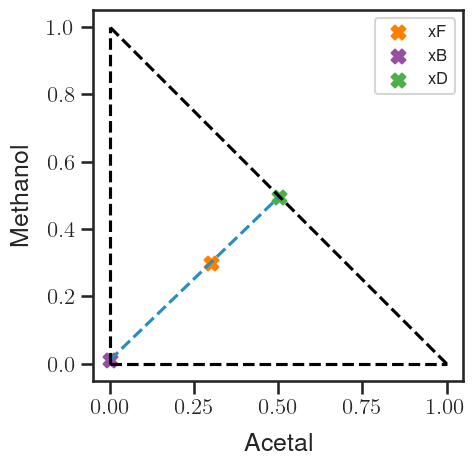

In [4]:
# Create a VLE model object
vle_model = VanLaarModel (3, P_sys, ["Acetal", "Methanol","H20"],[Acet_antoine, Methanol_antoine, H2O_antoine], A_ij, False )

# Create a distillation model
distillation_model = DistillationModelTernary(vle_model, xF = np.array([0.3, 0.3, 0.4]), xD = np.array([0.5030, 0.4960, 0.0010]), xB = np.array([1e-10, 0.0103 - 1e-10,0.9897]), reflux = 0.1)
#distillation_model = DistillationModelTernary(vle_model, xF = np.array([0.3, 0.3, 0.4]), xD = np.array([0.999, 9.96e-4, 4e-6]), xB = np.array([0.001, 0.4279, 0.5711]), reflux = 0.1)

# Create a residue curve map object
rcm = PhasePortraits(vle_model, distillation_model)

plot_mb(distillation_model)

In [5]:
# Setup sliders

R1_slider = widgets.FloatSlider(value=0.1, min=0.5, max=1.0, step=0.01,  description='Reflux Ratio:', readout_format='.2f')
R2_slider = widgets.FloatSlider(value=0.1, min=0.5, max=1.0, step=0.01,  description='Reflux Ratio:', readout_format='.2f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')

# Setup interactive objects

out_1 = Output()
out_2 = Output()

##### Demo 1: Rectifying Section

Use the slider to vary the reflux ratio.  Notice how the end of the rectifying section always changes with the reflux ratio, but experiences a much more rapid change between values of 0.65 and 0.68.

In [6]:
def on_go_button_click(b):
    with out_1:
        clear_output()
        plt.close('all')  # Close all open matplotlib plots
        plot_rect(distillation_model, rcm, rr = R1_slider.value)
        
go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([HBox([R1_slider, go_button]), out_1])
display(layout)

### Demo 2: Full Column

What are the implications of this ternary tangent pinch?

As Example 2 discussed, for a ternary column to be feasible, the rectifying and stripping sections need to overlap.
Change the reflux ratio again, and notice how the jump at the ternary pinch value is necessary for the column to be feasible.  This demonstration also highlights how slight changes to reflux ratio have a much larger impact on the rectifying section than on the stripping section.

Try reflux ratio (0.65 vs 0.67)

In [7]:
def on_go2_button_click(b):
    with out_2:
        clear_output()
        plt.close('all')  # Close all open matplotlib plots
        plot_rect_strip( distillation_model, rcm, rr = R2_slider.value)
        
go2_button = widgets.Button(description='Generate Plot')
go2_button.on_click(on_go2_button_click)

layout = VBox([HBox([R2_slider, go2_button]), out_2])
display(layout)